In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm


In [4]:
df = pd.read_csv('bank_data.csv')

In [5]:
df

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540000,Level 0 Recovery,19,Male
1,1150,486,416.090000,Level 0 Recovery,25,Female
2,380,527,429.350000,Level 0 Recovery,27,Male
3,1838,536,296.990000,Level 0 Recovery,25,Male
4,1995,541,346.385000,Level 0 Recovery,34,Male
...,...,...,...,...,...,...
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female


In [6]:
df.head()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,2030,194,263.540,Level 0 Recovery,19,Male
1,1150,486,416.090,Level 0 Recovery,25,Female
2,380,527,429.350,Level 0 Recovery,27,Male
3,1838,536,296.990,Level 0 Recovery,25,Male
4,1995,541,346.385,Level 0 Recovery,34,Male


In [7]:
df.tail()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
1877,361,9785,15388.195990,Level 4 Recovery,65,Female
1878,196,9857,9709.909257,Level 4 Recovery,68,Female
1879,313,9859,30209.181790,Level 4 Recovery,58,Female
1880,1781,9920,20386.232190,Level 4 Recovery,67,Female
1881,522,9964,16706.305920,Level 4 Recovery,53,Male


In [8]:
df.describe()

,id,expected_recovery_amount,actual_recovery_amount,age
count,1882.000000,1882.000000,1882.000000,1882.000000
mean,1035.596174,2759.967588,4000.967837,39.650372
std,591.458429,2019.826565,4576.506350,15.453072
min,6.000000,194.000000,200.425000,18.000000
25%,534.250000,1261.250000,1045.190300,28.000000
50%,1029.500000,2062.000000,2115.446373,35.000000
75%,1551.750000,3569.500000,5417.237207,50.000000
max,2056.000000,9964.000000,34398.479710,84.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1882 entries, 0 to 1881
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1882 non-null   int64  
 1   expected_recovery_amount  1882 non-null   int64  
 2   actual_recovery_amount    1882 non-null   float64
 3   recovery_strategy         1882 non-null   object 
 4   age                       1882 non-null   int64  
 5   sex                       1882 non-null   object 
dtypes: float64(1), int64(3), object(2)
memory usage: 88.3+ KB


In [10]:
df.isnull()

,id,expected_recovery_amount,actual_recovery_amount,recovery_strategy,age,sex
0,False,False,False,False,False,False
1,False,False,False,False,False,False
2,False,False,False,False,False,False
3,False,False,False,False,False,False
4,False,False,False,False,False,False
...,...,...,...,...,...,...
1877,False,False,False,False,False,False
1878,False,False,False,False,False,False
1879,False,False,False,False,False,False
1880,False,False,False,False,False,False


In [11]:
df.isnull().sum()

id                          0
expected_recovery_amount    0
actual_recovery_amount      0
recovery_strategy           0
age                         0
sex                         0
dtype: int64

In [12]:
df.columns.values

array(['id', 'expected_recovery_amount', 'actual_recovery_amount',
       'recovery_strategy', 'age', 'sex'], dtype=object)

### Graphical Exploratory Data Analysis 

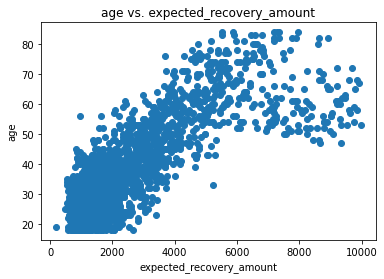

In [13]:
plt.scatter(df['expected_recovery_amount'], df['age'])
plt.xlabel('expected_recovery_amount')
plt.ylabel('age')
plt.title('age vs. expected_recovery_amount')
plt.show()

### Statistical Test - Age vs. Expected Recovery Amount

In [14]:
below_threshold = df[df['expected_recovery_amount'] <= 1000]['age']
above_threshold = df[df['expected_recovery_amount'] > 1000]['age']
t_stat, p_value = stats.ttest_ind(below_threshold, above_threshold)
print(f"T-Statistic: {t_stat}, P-Value: {p_value}")

T-Statistic: -13.759810322222165, P-Value: 4.071778578392043e-41


### Statistical Test - Sex vs. Expected Recovery Amount 

In [15]:
below_threshold_data = df[df['expected_recovery_amount'] <= 1000]
above_threshold_data = df[df['expected_recovery_amount'] > 1000]

# Debugging: Check the data in each category
print("Below Threshold Data:")
print(below_threshold_data.head())

print("Above Threshold Data:")
print(above_threshold_data.head())

# Verify that 'Sex' column has valid data
print("Unique 'sex' Values:")
print(df['sex'].unique())

# Verify that you have a reasonable distribution of data points in each category
print("Number of Data Points in Each Category:")
print("Below Threshold:", below_threshold_data.shape[0])
print("Above Threshold:", above_threshold_data.shape[0])

# Perform the chi-square test
cross_tab = pd.crosstab(below_threshold_data['sex'], above_threshold_data['sex'])
chi2, p_value, _, _ = stats.chi2_contingency(cross_tab)
print(f"Chi-Square: {chi2}, P-Value: {p_value}")

Below Threshold Data:
     id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
0  2030                       194                 263.540  Level 0 Recovery   
1  1150                       486                 416.090  Level 0 Recovery   
2   380                       527                 429.350  Level 0 Recovery   
3  1838                       536                 296.990  Level 0 Recovery   
4  1995                       541                 346.385  Level 0 Recovery   

   age     sex  
0   19    Male  
1   25  Female  
2   27    Male  
3   25    Male  
4   34    Male  
Above Threshold Data:
       id  expected_recovery_amount  actual_recovery_amount recovery_strategy  \
247  1629                      1001             1723.549220  Level 1 Recovery   
248  2021                      1001              612.777647  Level 1 Recovery   
249  1478                      1002             1659.941630  Level 1 Recovery   
250   153                      1005              735.26

ValueError: No data; `observed` has size 0.

### Exploratory Graphical Analysis - Recovery Amount

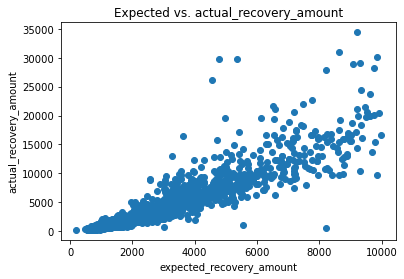

In [16]:
plt.scatter(df['expected_recovery_amount'], df['actual_recovery_amount'])
plt.xlabel('expected_recovery_amount')
plt.ylabel('actual_recovery_amount')
plt.title('Expected vs. actual_recovery_amount')
plt.show()

### Statistical Analysis - Recovery Amount

In [17]:
window_1 = df[(df['expected_recovery_amount'] >= 900) & (df['expected_recovery_amount'] <= 1100)]
window_2 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]
kruskal_test_1 = stats.kruskal(window_1['actual_recovery_amount'], window_1['expected_recovery_amount'])
kruskal_test_2 = stats.kruskal(window_2['actual_recovery_amount'], window_2['expected_recovery_amount'])
print(f"Kruskal-Wallis Test for Window 1: {kruskal_test_1}")
print(f"Kruskal-Wallis Test for Window 2: {kruskal_test_2}")

Kruskal-Wallis Test for Window 1: KruskalResult(statistic=98.43345457373502, pvalue=3.361323971641858e-23)
Kruskal-Wallis Test for Window 2: KruskalResult(statistic=56.821597680846416, pvalue=4.7719656724510236e-14)


### Regression Modeling - No Threshold

In [18]:
X = df['expected_recovery_amount']
y = df['actual_recovery_amount']
X = sm.add_constant(X)
model_1 = sm.OLS(y, X).fit()
print(model_1.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.817
Model:                                OLS   Adj. R-squared:                  0.817
Method:                     Least Squares   F-statistic:                     8378.
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):               0.00
Time:                            15:05:29   Log-Likelihood:                -16936.
No. Observations:                    1882   AIC:                         3.388e+04
Df Residuals:                        1880   BIC:                         3.389e+04
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

### Regression Modeling - Adding True Threshold

In [ ]:
df['Above_Threshold'] = np.where(df['expected_recovery_amount'] > 1000, 1, 0)
X = df[['expected_recovery_amount', 'Above_Threshold']]
X = sm.add_constant(X)
model_2 = sm.OLS(y, X).fit()
print(model_2.summary())

### Regression Modeling - Adjusting the Window

In [20]:
window_3 = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]
X_window_3 = window_3[['expected_recovery_amount', 'Above_Threshold']]
X_window_3 = sm.add_constant(X_window_3)
model_3 = sm.OLS(window_3['actual_recovery_amount'], X_window_3).fit()
print(model_3.summary())


                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):           2.42e-07
Time:                            15:05:30   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------

In [24]:
window_adjusted = df[(df['expected_recovery_amount'] >= 950) & (df['expected_recovery_amount'] <= 1050)]

# Prepare the data for regression
X_window_adjusted = window_adjusted[['expected_recovery_amount', 'Above_Threshold']]
X_window_adjusted = sm.add_constant(X_window_adjusted)

# Fit the regression model
model_window_adjusted = sm.OLS(window_adjusted['actual_recovery_amount'], X_window_adjusted).fit()

# Print model summary
print(model_window_adjusted.summary())

                              OLS Regression Results                              
Dep. Variable:     actual_recovery_amount   R-squared:                       0.270
Model:                                OLS   Adj. R-squared:                  0.255
Method:                     Least Squares   F-statistic:                     17.90
Date:                    Wed, 23 Aug 2023   Prob (F-statistic):           2.42e-07
Time:                            15:11:53   Log-Likelihood:                -700.65
No. Observations:                     100   AIC:                             1407.
Df Residuals:                          97   BIC:                             1415.
Df Model:                               2                                         
Covariance Type:                nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------